# Sentiment Analysis on IMDB Movie Reviews
This notebook performs sentiment analysis using multiple machine learning models.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
import warnings 
warnings.filterwarnings("ignore")

In [11]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Load and Explore the Dataset

In [13]:
df = pd.read_csv("D:\Data\IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Preprocessing

In [15]:
pip install nltk

     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.5 kB ? eta -:--:--
     ------------------ ------------------- 20.5/41.5 kB 320.0 kB/s eta 0:00:01
     ------------------ ------------------- 20.5/41.5 kB 320.0 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 182.0 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------- ----------- 41.0/57.7 kB 1.9 MB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.7 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 57.7/57.7 kB 435.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.5 MB 1.7 MB/s eta 0:00:01
   - -------------------------------------- 0.1/1.5 MB 1.7 MB/s eta 0:00:01
   --- ------------------------------------ 0.1/1.5 MB 1.1 MB/s eta 0:00:02
   ---


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters
    text = text.lower().split()
    text = [word for word in text if word not in stop_words]
    return ' '.join(text)

df['cleaned_review'] = df['review'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\y\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


## Convert Text to Numerical Data (TF-IDF)

In [17]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment'].map({'positive': 1, 'negative': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X.shape

(50000, 5000)

## Train and Evaluate Models

In [21]:
models = {
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier()
}

In [22]:


results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    results[name] = acc
    print(f'{name}: {acc:.4f}')

results

Naive Bayes: 0.8554
Random Forest: 0.8532
KNN: 0.7467
XGBoost: 0.8573
Logistic Regression: 0.8922
Decision Tree: 0.7159


{'Naive Bayes': 0.8554,
 'Random Forest': 0.8532,
 'KNN': 0.7467,
 'XGBoost': 0.8573,
 'Logistic Regression': 0.8922,
 'Decision Tree': 0.7159}

## Task Completed!

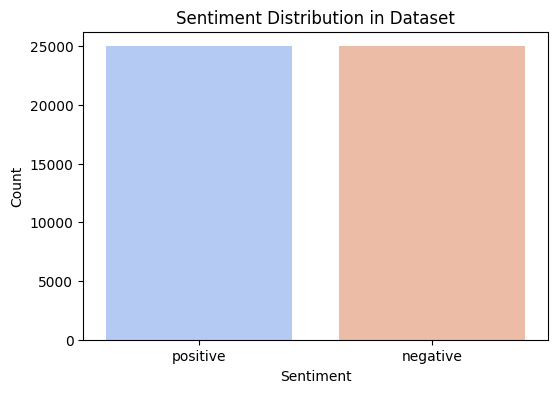

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['sentiment'], palette='coolwarm')
plt.title('Sentiment Distribution in Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [25]:
pip install wordcloud


   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/299.9 kB 495.5 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/299.9 kB 573.4 kB/s eta 0:00:01
   ---------------- --------------------- 133.1/299.9 kB 787.7 kB/s eta 0:00:01
   ----------------------- -------------- 184.3/299.9 kB 798.5 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/299.9 kB 983.0 kB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


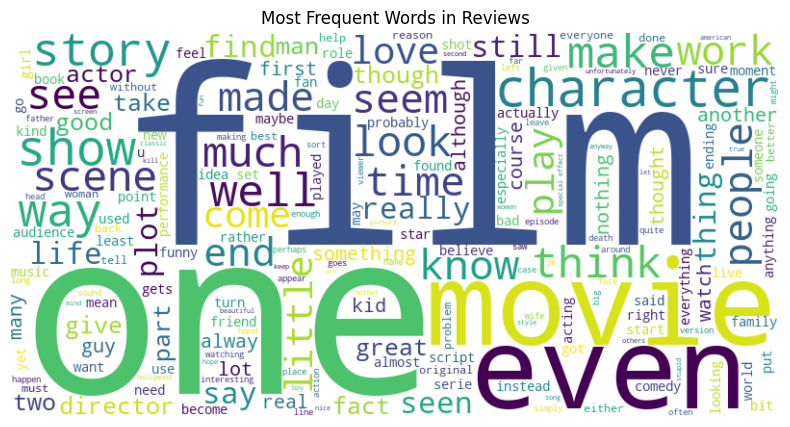

In [26]:
from wordcloud import WordCloud

# Combine all cleaned reviews into one large text
all_words = ' '.join(df['cleaned_review'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Reviews')
plt.show()